In [105]:
#importing all the necessary libraries

In [106]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import matplotlib.ticker as mtick
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
# Visualization
from sklearn.model_selection import train_test_split
from sklearn import datasets



<b>1. Data Understanding & Exploration: [5 Marks]
    
A. Read ‘TelcomCustomer-Churn_1.csv’ as a DataFrame and assign it to a variable. [1 Mark]
    
B. Read ‘TelcomCustomer-Churn_2.csv’ as a DataFrame and assign it to a variable. [1 Mark]
    
C. Merge both the DataFrames on key ‘customerID’ to form a single DataFrame [2 Mark]
    
D. Verify if all the columns are incorporated in the merged DataFrame by using simple comparison Operator in Python. [1 Marks]</b>

In [107]:
#read first csv file
TelecomCustomer1=pd.read_csv("TelcomCustomer-Churn_1.csv")

In [108]:
#read second csv file
TelecomCustomer2=pd.read_csv("TelcomCustomer-Churn_2.csv")

In [109]:
#merging the two csv files
TelecomCustomerData=pd.merge(TelecomCustomer1,TelecomCustomer2,on=["customerID"])

In [110]:
#printing first 5 rows of the dataframe
TelecomCustomerData.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [111]:
#after merging the csv files set_index 
TelecomCustomerData.reset_index(inplace=True)
TelecomCustomerData.drop("index",axis=1,inplace=True)

In [112]:
#Verify if all the columns are incorporated in the merged DataFrame
TelecomCustomerData.columns[0:21].sort_values()==TelecomCustomer1.columns|TelecomCustomer2.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

<b>2. Data Cleaning & Analysis: [5 Marks]
    
A. Impute missing/unexpected values in the DataFrame. [2 Marks]

B. Make sure all the variables with continuous values are of ‘Float’ type. [2 Marks]
[For Example: MonthlyCharges, TotalCharges]

C. Create a function that will accept a DataFrame as input and return pie-charts for all the appropriate Categorical features. Clearly show percentage
distribution in the pie-chart. [4 Marks]

D. Share insights for Q2.c. [2 Marks]

E. Encode all the appropriate Categorical features with the best suitable approach. [2 Marks]

F. Split the data into 80% train and 20% test. [1 Marks]

G. Normalize/Standardize the data with the best suitable approach. [2 Marks]</b>

In [113]:
#checking for null values
TelecomCustomerData.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [114]:
#checking for unique values in the dataframes
a=TelecomCustomerData.columns[:21]
uniques = {col: TelecomCustomerData[col].nunique() for col in a}
uniques

{'customerID': 7043,
 'gender': 2,
 'SeniorCitizen': 2,
 'Partner': 2,
 'Dependents': 2,
 'tenure': 73,
 'PhoneService': 2,
 'MultipleLines': 3,
 'InternetService': 3,
 'OnlineSecurity': 3,
 'OnlineBackup': 3,
 'DeviceProtection': 3,
 'TechSupport': 3,
 'StreamingTV': 3,
 'StreamingMovies': 3,
 'Contract': 3,
 'PaperlessBilling': 2,
 'PaymentMethod': 4,
 'MonthlyCharges': 1585,
 'TotalCharges': 6531,
 'Churn': 2}

In [115]:
#checking for the info in the dataframe
TelecomCustomerData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [116]:
TelecomCustomerData['MultipleLines']=TelecomCustomerData['MultipleLines'].replace('No phone service','No')
TelecomCustomerData['OnlineSecurity']=TelecomCustomerData['OnlineSecurity'].replace('No internet service','No')
TelecomCustomerData['OnlineBackup']=TelecomCustomerData['OnlineBackup'].replace('No internet service','No')
TelecomCustomerData['DeviceProtection']=TelecomCustomerData['DeviceProtection'].replace('No internet service','No')
TelecomCustomerData['TechSupport']=TelecomCustomerData['TechSupport'].replace('No internet service','No')
TelecomCustomerData['StreamingTV']=TelecomCustomerData['StreamingTV'].replace('No internet service','No')
TelecomCustomerData['StreamingMovies']=TelecomCustomerData['StreamingMovies'].replace('No internet service','No')

In [117]:
#Converting into integer;
TelecomCustomerData['TotalCharges'] = pd.to_numeric(TelecomCustomerData['TotalCharges'],
                                   errors='coerce')

TelecomCustomerData[TelecomCustomerData.TotalCharges.isna()].shape

(11, 21)

In [118]:
#filling the null vales with 0
TelecomCustomerData['TotalCharges']=TelecomCustomerData['TotalCharges'].fillna(0)
TelecomCustomerData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [119]:
#removing unwanted column
Telcomdata=TelecomCustomerData.drop(['customerID'],axis=1)

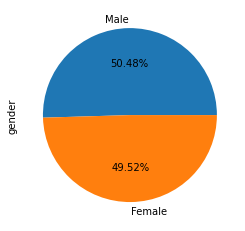

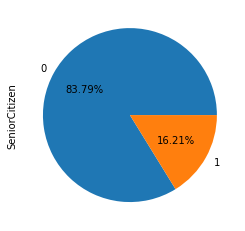

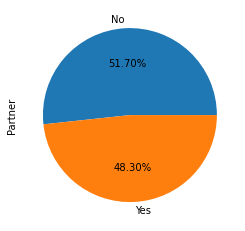

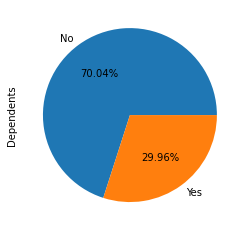

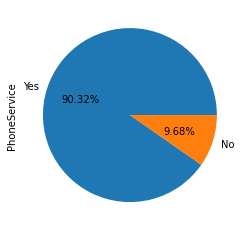

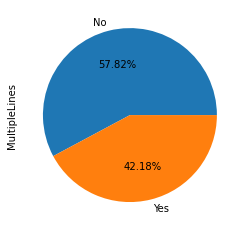

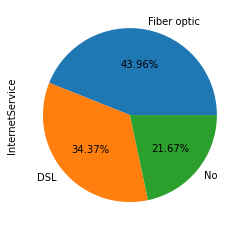

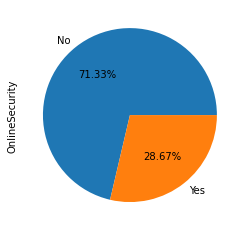

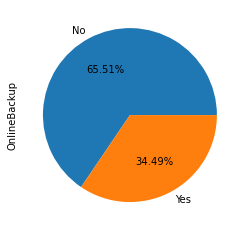

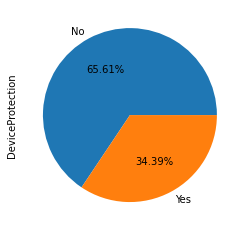

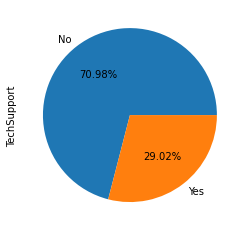

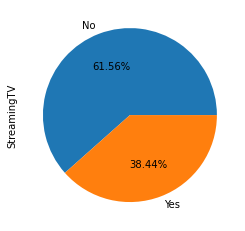

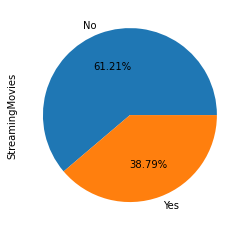

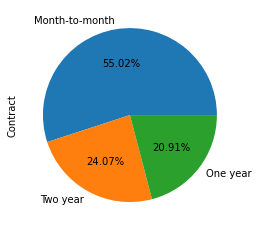

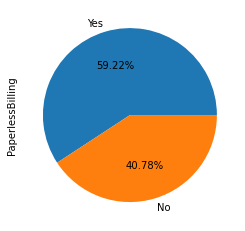

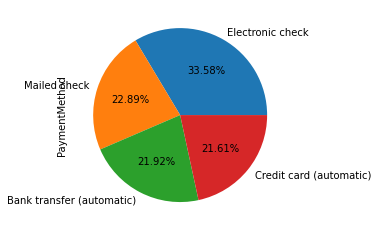

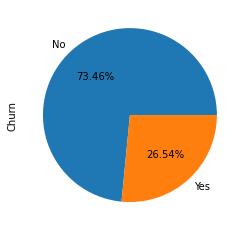

In [120]:
#visualising the categorical variables using pie chart
def visualise(filename):
    for cname in filename.columns:
        if(filename[cname].nunique() < 6):
            filename[cname].value_counts().plot(kind='pie',autopct='%.2f%%')
            plt.show()
visualise(Telcomdata)

<b>All the pie charts are considers all the rows in the data that is 7043 row or the customerId.accourding to the total entries the individual column object data is classified.

1)gender:in total there are 49.52% of female and 50.48%are male

2)seniorcitizen: There are 16.21% of seniorcitizen.

3)partners:There are customers who have partners are 48.30% and 51.70% they dont have

4)Dependents:for 29.96% of the customers they have dependents.and 70.04% they dont have.

5)phoneservice:90.32% are having phoneservice.

6)multiplelines:only 42.18% of customers are having multiplelines.

7)internetservice: 34.37% of customers are having DSL as internetservice,
                   and 43.96% of customers are having Fiber optic other 
                   21.67% customers are not having internetservice
                   
8)onlineseurity:28.67% are having onlinesecurity
               71.33% are not having onlinesecurity.
               
9)onlinebackup:34.49% are having onlinebackup.
                65.51% are not having onlinebackup.
                
10)deviceprotection:34.39% are having deviceprotection
                    65.61% are not having deviceprotection.
                    
11)TechSupport:29.02% are having TechSupport
               70.98% are not having TechSupport.
               
12)streamingTV:38.44% are having streamingTV
                61.56% are not having streamingTV.
                
13)streamingmovie:38.79% are streamning tv
                  61.21 are not streamning tv
                  
14)contract:month-to-month contracters 55.02%
            oneyear contracters 20.919%
            two year contracters 24.07%
            
15)paperlessbilling:59.22% are with paperlessbilling
                    40.78% are without paperlessbilling
                    
16)paymentmethod:banktransfer automatic 21.92%
                 creditcard automatic 21.61%
                 electronic check 33.58%
                 mailed check 22.89%
                 
17)churn: totally 26.54% of customers are churned
           and 73.46% of customers are unchurned.
</b>

In [121]:
#converting categorical into numerical using labelencoder:
def labelencode(dataframe):
    catsDf = dataframe.select_dtypes(include=['object'])
    labelencoder = LabelEncoder()
    for cname in catsDf:
        dataframe[cname] = labelencoder.fit_transform(catsDf[cname])
        #filename[cname] = converttocategory(filename[cname])
    return dataframe
labelencode(Telcomdata)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,0,1,0,1,1,1,1,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,1,1,0,1,1,0,1,1,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,0,0,1,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,1,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


In [122]:
Telcomdata['SeniorCitizen']=Telcomdata['SeniorCitizen'].astype('int32')

In [123]:
numerical_cols = Telcomdata.select_dtypes(exclude=['int32']).columns.values
Telcomdata[numerical_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


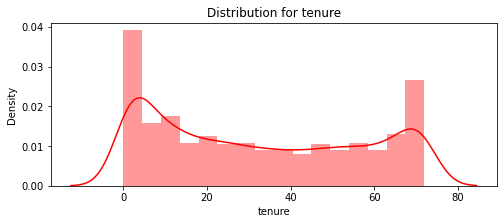

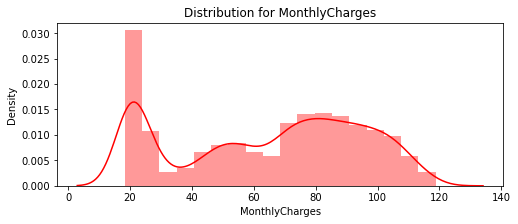

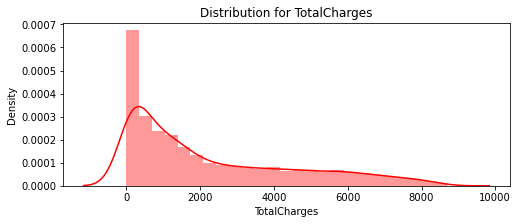

In [124]:
#Before and After Standardizing the data
numerical_cols = Telcomdata.select_dtypes(exclude=['int32']).columns.values
def distplot(feature, frame, color='Red'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)

def check(TelecomCustomerData1):
    #numerical_cols = TelecomCustomerData1.select_dtypes(include=['int64','float32','float64']).columns.values
    for feat in numerical_cols: distplot(feat, TelecomCustomerData1)
        

        
        
        
check(Telcomdata)

,tenure,MonthlyCharges,TotalCharges
0,-1.277445,-1.160323,-0.992611
1,0.066327,-0.259629,-0.172165
2,-1.236724,-0.362660,-0.958066
3,0.514251,-0.746535,-0.193672
4,-1.236724,0.197365,-0.938874
...,...,...,...
7038,-0.340876,0.665992,-0.127605
7039,1.613701,1.277533,2.242606
7040,-0.870241,-1.168632,-0.852932
7041,-1.155283,0.320338,-0.870513


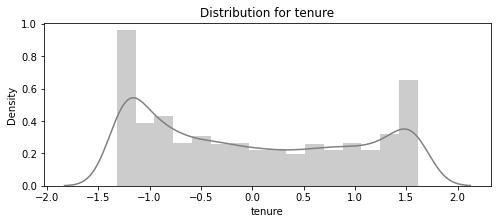

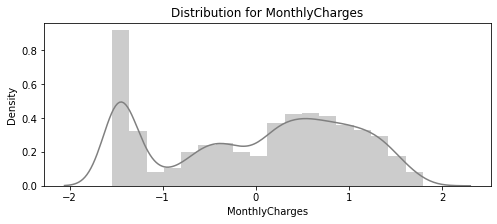

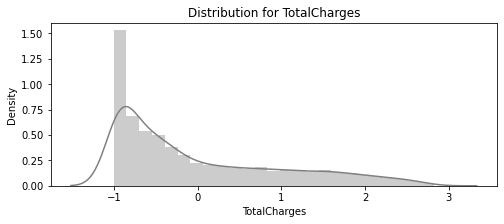

In [125]:
postdistplot(Telcomdata)

In [126]:
#removing unwanted columns
data = Telcomdata.drop([ 'gender', 'SeniorCitizen', 'Partner', 'Dependents','tenure',
                  'MultipleLines', 'DeviceProtection','TechSupport','PaperlessBilling',
                 'OnlineSecurity','OnlineBackup'],axis=1)

In [127]:
data.isna().sum()

PhoneService       0
InternetService    0
StreamingTV        0
StreamingMovies    0
Contract           0
PaymentMethod      0
MonthlyCharges     0
TotalCharges       0
Churn              0
dtype: int64

In [128]:
X=data.drop(columns='Churn').copy()
X.head()

,PhoneService,InternetService,StreamingTV,StreamingMovies,Contract,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,0,0,0,2,29.85,29.85
1,1,0,0,0,1,3,56.95,1889.50
2,1,0,0,0,0,3,53.85,108.15
3,0,0,0,0,1,0,42.30,1840.75
4,1,1,0,0,0,2,70.70,151.65


In [129]:
Y=data['Churn'].copy()
Y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int32

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=42,stratify=Y)

In [131]:
y_train.isna().sum()

0

<b>3. Model building and Improvement: [10 Marks]
    
A. Train a model using XGBoost. Also print best performing parameters along with train and test performance. [5 Marks]

B. Improve performance of the XGBoost as much as possible. Also print best performing parameters along with train and test performance. [5 Marks]
</b>

<b>Building XGBoost Baseline Model</b>

In [132]:
param_dist = {'objective':'binary:logistic','n_estimators':10}

clf = xgb.XGBClassifier(**param_dist,
                        )

clf.fit(X_train, y_train,
        verbose=True,
        early_stopping_rounds=10,
        eval_metric='aucpr',
        eval_set=[(X_train, y_train)],
        )

#evals_result = clf.evals_result()

[0]	validation_0-aucpr:0.67186
[1]	validation_0-aucpr:0.68382
[2]	validation_0-aucpr:0.69125
[3]	validation_0-aucpr:0.69729
[4]	validation_0-aucpr:0.70740
[5]	validation_0-aucpr:0.71521
[6]	validation_0-aucpr:0.72316
[7]	validation_0-aucpr:0.73183
[8]	validation_0-aucpr:0.73644
[9]	validation_0-aucpr:0.74048


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=10, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

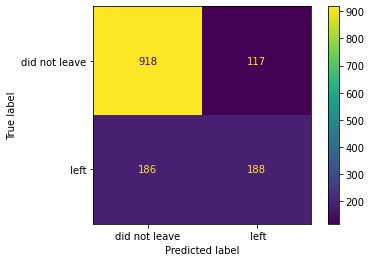

In [133]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf,
                     X_test,y_test,
                     values_format='d',
                     display_labels=["did not leave" , " left"]
                     )

In the confusion matrix,we see that of the  <b>1036</b> people that <b>did not leave 940(90.7%)</b> were correnctly classified.

And of the <b>373</b> people that <b>left</b> the company,<b>193(51%)</b> were corrently classified.

Our data is <b>imbalance</b>.

<b>Tweaking the parameters for handling Class Imbalance in Dataset.

scale_pos_weight is tuned for Imbalanced Datasets</b>

In [134]:
param_grid = {
    'max_depth' : [3,4,5],
    'learning_rate' : [0,1,0.01,0.05],
    'gamma' : [0,0.25,1.0],
    'reg_lambda' : [0,1.0,10.0],
    'scale_pos_weight' : [1,3,5]
}

In [135]:
param_grid = {
    'max_depth' : [4],
    'learning_rate' : [0.1,0.5,1],
    'gamma' : [0.25],
    'reg_lambda' : [10.0,20,100],
    'scale_pos_weight' : [3]
}

In [136]:
xgb_estimator = xgb.XGBClassifier(objective='binary:logistic',
                                  seed=24,
                                  subsample=0.9,
                                  colsample_bytree=0.5)

<b>Hyperparameter Tuning with GridSearchCV</b>

In [137]:
clf_xgb_tuned = GridSearchCV(estimator=xgb_estimator,
                             param_grid=param_grid,
                             scoring='roc_auc',
                             verbose=2,
                             n_jobs=-1,
                             cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=24)
)

In [138]:
clf_xgb_tuned.fit(X_train,
                  y_train,
                  verbose=True,
                  early_stopping_rounds=10,
                  eval_metric='aucpr',
           eval_set=[(X_test, y_test)]
)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[0]	validation_0-aucpr:0.56516
[1]	validation_0-aucpr:0.54711
[2]	validation_0-aucpr:0.54601
[3]	validation_0-aucpr:0.54544
[4]	validation_0-aucpr:0.54129
[5]	validation_0-aucpr:0.56436
[6]	validation_0-aucpr:0.56426
[7]	validation_0-aucpr:0.56105
[8]	validation_0-aucpr:0.59034
[9]	validation_0-aucpr:0.58871
[10]	validation_0-aucpr:0.58595
[11]	validation_0-aucpr:0.59269
[12]	validation_0-aucpr:0.60881
[13]	validation_0-aucpr:0.60935
[14]	validation_0-aucpr:0.60684
[15]	validation_0-aucpr:0.61611
[16]	validation_0-aucpr:0.61427
[17]	validation_0-aucpr:0.61473
[18]	validation_0-aucpr:0.62243
[19]	validation_0-aucpr:0.62596
[20]	validation_0-aucpr:0.62961
[21]	validation_0-aucpr:0.63171
[22]	validation_0-aucpr:0.62953
[23]	validation_0-aucpr:0.62843
[24]	validation_0-aucpr:0.62697
[25]	validation_0-aucpr:0.63140
[26]	validation_0-aucpr:0.63040
[27]	validation_0-aucpr:0.63152
[28]	validation_0-aucpr:0.63097
[29]	validation_0-aucp

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=24, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.5,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_ch...
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                           

In [139]:
train_score = clf_xgb_tuned.score(X_train,y_train)
test_score = clf_xgb_tuned.score(X_test,y_test)
print('Training ACC.: ', train_score)
print('Testing ACC.: ', test_score)

Training ACC.:  0.8631151110935138
Testing ACC.:  0.8407075873827791


<b>GridSearchCV Results</b>

In [140]:
clf_xgb_tuned.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, gamma=0.25, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1,
              predictor='auto', random_state=24, reg_alpha=0, reg_lambda=20,
              scale_pos_weight=3, seed=24, subsample=0.9, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [141]:
clf_xgb_tuned.best_params_

{'gamma': 0.25,
 'learning_rate': 0.1,
 'max_depth': 4,
 'reg_lambda': 20,
 'scale_pos_weight': 3}

In [142]:
clf_xgb_tuned.best_score_

0.8440942076430625

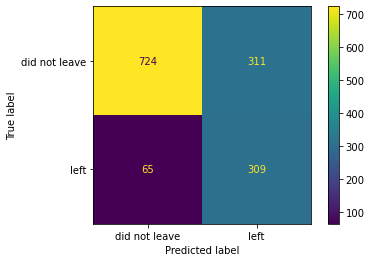

In [143]:
plot_confusion_matrix(clf_xgb_tuned,
                     X_test,
                     y_test,
                     values_format='d',
                     display_labels=['did not leave','left'])

In [144]:
y_pred = clf_xgb_tuned.predict(X_test)

<b>Classification Report for the Hyperparameter Tuned Model</b>

In [145]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.70      0.92      0.79       789
           1       0.83      0.50      0.62       620

    accuracy                           0.73      1409
   macro avg       0.76      0.71      0.71      1409
weighted avg       0.76      0.73      0.72      1409



<b>ROC AUC Curve for the Hyperparameter Tuned Model</b>

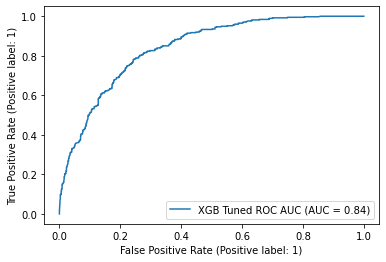

In [146]:
plot_roc_curve(clf_xgb_tuned,
               X_test,
               y_test,
               name='XGB Tuned ROC AUC');

<b>Precision-Recall Curve for the Hyperparameter Tuned Model</b>

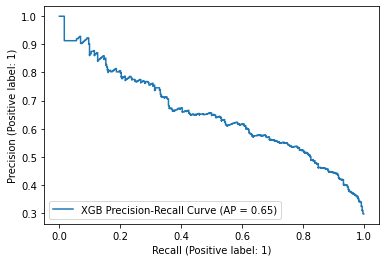

In [147]:
plot_precision_recall_curve(clf_xgb_tuned,
               X_test,
               y_test,
               name='XGB Precision-Recall Curve');

<b>Visualizing the XGBoost Tree</b>

In [148]:
xgb_lone_estimator = xgb.XGBClassifier(
    objective='binary:logistic', 
    seed=24, 
    subsample=0.9, 
    colsample_bytree=0.5, 
    gamma = 0.25, 
    learning_rate=0.05, 
    max_depth=4,
    reg_lambda=10.0, 
    scale_pos_weight=3,
    n_estimator=1
)

In [149]:
xgb_lone_estimator.fit(X_train, y_train)

[14:00:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:00:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, gamma=0.25, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimator=1, n_estimators=100, n_jobs=12, num_parallel_tree=1,
              predictor='auto', random_state=24, reg_alpha=0, reg_lambda=10.0,
              scale_pos_weight=3, seed=24, subsample=0.9, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [150]:
xgb_bst = xgb_lone_estimator.get_booster()

In [151]:
for importance_type in ('weight', 'gain', 'cover', 'total_gain', 'total_cover'):
    print('%s:  ' % importance_type, xgb_bst.get_score(importance_type=importance_type))

weight:   {'PhoneService': 29.0, 'InternetService': 133.0, 'StreamingTV': 51.0, 'StreamingMovies': 57.0, 'Contract': 85.0, 'PaymentMethod': 131.0, 'MonthlyCharges': 324.0, 'TotalCharges': 396.0}
gain:   {'PhoneService': 4.5245161056518555, 'InternetService': 50.45486831665039, 'StreamingTV': 10.140640258789062, 'StreamingMovies': 12.366602897644043, 'Contract': 191.24557495117188, 'PaymentMethod': 17.558822631835938, 'MonthlyCharges': 14.700364112854004, 'TotalCharges': 16.251821517944336}
cover:   {'PhoneService': 250.62806701660156, 'InternetService': 659.42333984375, 'StreamingTV': 540.5069580078125, 'StreamingMovies': 468.02044677734375, 'Contract': 964.3038330078125, 'PaymentMethod': 519.00439453125, 'MonthlyCharges': 369.43157958984375, 'TotalCharges': 392.081787109375}
total_gain:   {'PhoneService': 131.21096801757812, 'InternetService': 6710.49755859375, 'StreamingTV': 517.1726684570312, 'StreamingMovies': 704.8963623046875, 'Contract': 16255.8740234375, 'PaymentMethod': 2300.2

In [152]:
node_params = {
    'shape' : 'box',
    'style' : 'filled, rounded',
    'fillcolor' : '#78cbe'
}

leaf_params = {
    'shape' : 'box',
    'style' : 'filled',
    'fillcolor' : '#e48038'
}

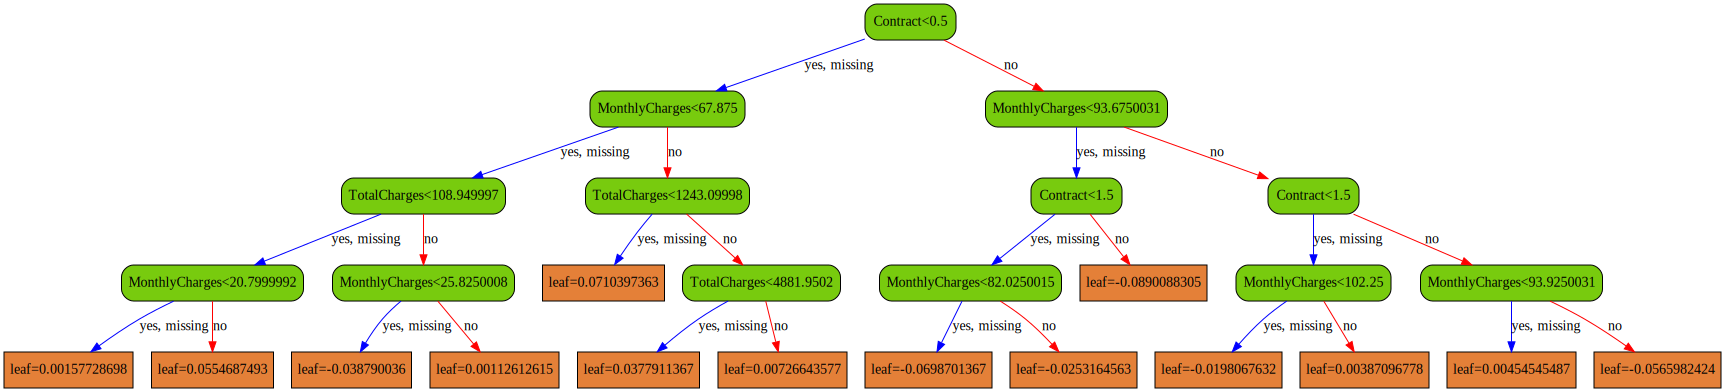

In [153]:
xgb.to_graphviz(xgb_lone_estimator,
                num_trees=0,
                size="2,2",
                condition_node_params=node_params,
                leaf_node_params=leaf_params
)

<b><font size=5>part2</font></b>

In [158]:
#taking two data csv files merging and setting the index:
def main():
    val1=input("enter the csv file name:")
    val2=input("enter second csv file name")
    data1=pd.read_csv(val1)
    data2=pd.read_csv(val2)
    a = data2.columns.intersection(data1.columns)
    data=pd.merge(data1,data2,on=a.values[0])
    
    #Make sure it has no duplicate indexes after the merge. Reset index helps this.
    
    data.reset_index(inplace=True)
    data.drop("index",axis=1,inplace=True)
    return(data)

In [159]:
data=main()
data

enter the csv file name:TelcomCustomer-Churn_1.csv
enter second csv file nameTelcomCustomer-Churn_2.csv


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [157]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [160]:
#Quick read of the dataframe:
def datacheck(dataframe):
    print(data.head(5))
    print(data.shape)
    print(data.dtypes)
    print(data.columns)
    missing_values=data.isna().sum()
    print(missing_values)
datacheck(data)

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [161]:
#converting categorical into numerical:
def convertCategoricalToNumeric(filename):
    labelencoder = LabelEncoder()
    for col in filename:
        if(filename[col].nunique()<6):
            filename[col] = labelencoder.fit_transform(filename[col])
    return filename
convertCategoricalToNumeric(data)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,2,0,2,...,2,2,2,2,1,1,3,84.80,1990.5,0
7039,2234-XADUH,0,0,1,1,72,1,2,1,0,...,2,0,2,2,1,1,1,103.20,7362.9,0
7040,4801-JZAZL,0,0,1,1,11,0,1,0,2,...,0,0,0,0,0,1,2,29.60,346.45,0
7041,8361-LTMKD,1,1,1,0,4,1,2,1,0,...,0,0,0,0,0,1,3,74.40,306.6,1


In [162]:
#Converting into integer;
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'],
                                   errors='coerce')

In [163]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int32  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int32  
 4   Dependents        7043 non-null   int32  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int32  
 7   MultipleLines     7043 non-null   int32  
 8   InternetService   7043 non-null   int32  
 9   OnlineSecurity    7043 non-null   int32  
 10  OnlineBackup      7043 non-null   int32  
 11  DeviceProtection  7043 non-null   int32  
 12  TechSupport       7043 non-null   int32  
 13  StreamingTV       7043 non-null   int32  
 14  StreamingMovies   7043 non-null   int32  
 15  Contract          7043 non-null   int32  
 16  PaperlessBilling  7043 non-null   int32  


In [164]:
data['SeniorCitizen']=data['SeniorCitizen'].astype('int32')
del data['customerID']

In [165]:
#printing 5 number summary of countinuous variables and mean and std.
def describe(filename):
    consDf = filename.select_dtypes(include=['int64','float32','float64'])
    describe=consDf.describe()
    print(describe)
describe(data)

            tenure  MonthlyCharges  TotalCharges
count  7043.000000     7043.000000   7032.000000
mean     32.371149       64.761692   2283.300441
std      24.559481       30.090047   2266.771362
min       0.000000       18.250000     18.800000
25%       9.000000       35.500000    401.450000
50%      29.000000       70.350000   1397.475000
75%      55.000000       89.850000   3794.737500
max      72.000000      118.750000   8684.800000


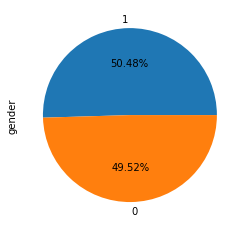

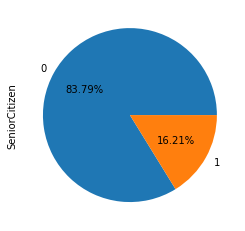

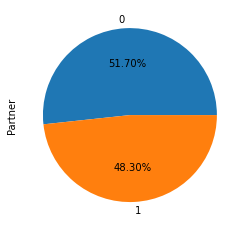

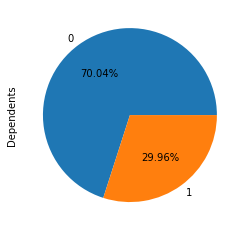

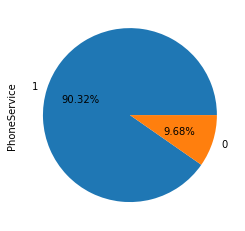

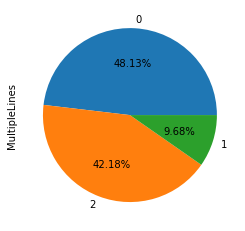

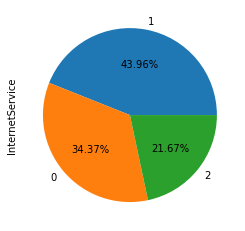

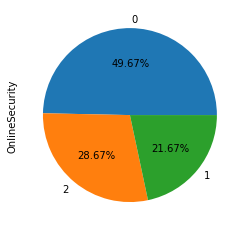

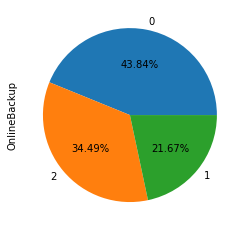

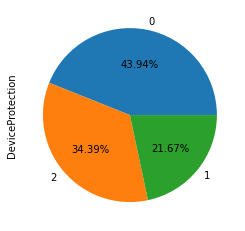

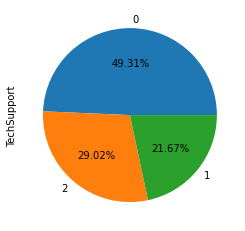

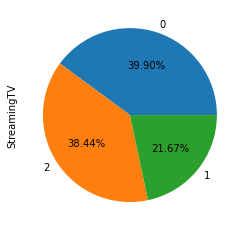

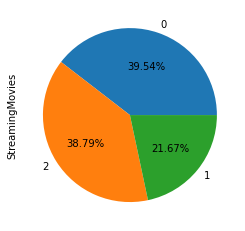

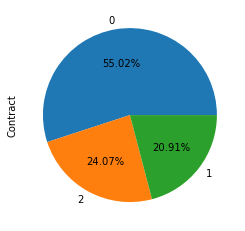

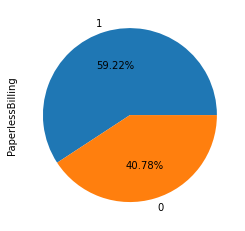

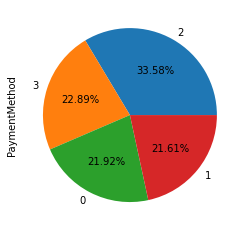

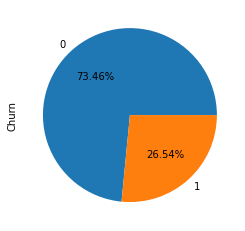

In [166]:
#univariate analysis for the categorial data
def univariate(filename):
    catsDf = filename.select_dtypes(include=['int'])
    for cname in catsDf.columns:
        if(filename[cname].nunique() < 6):
            catsDf[cname].value_counts().plot(kind='pie',autopct='%.2f%%')
            plt.show()
univariate(data)

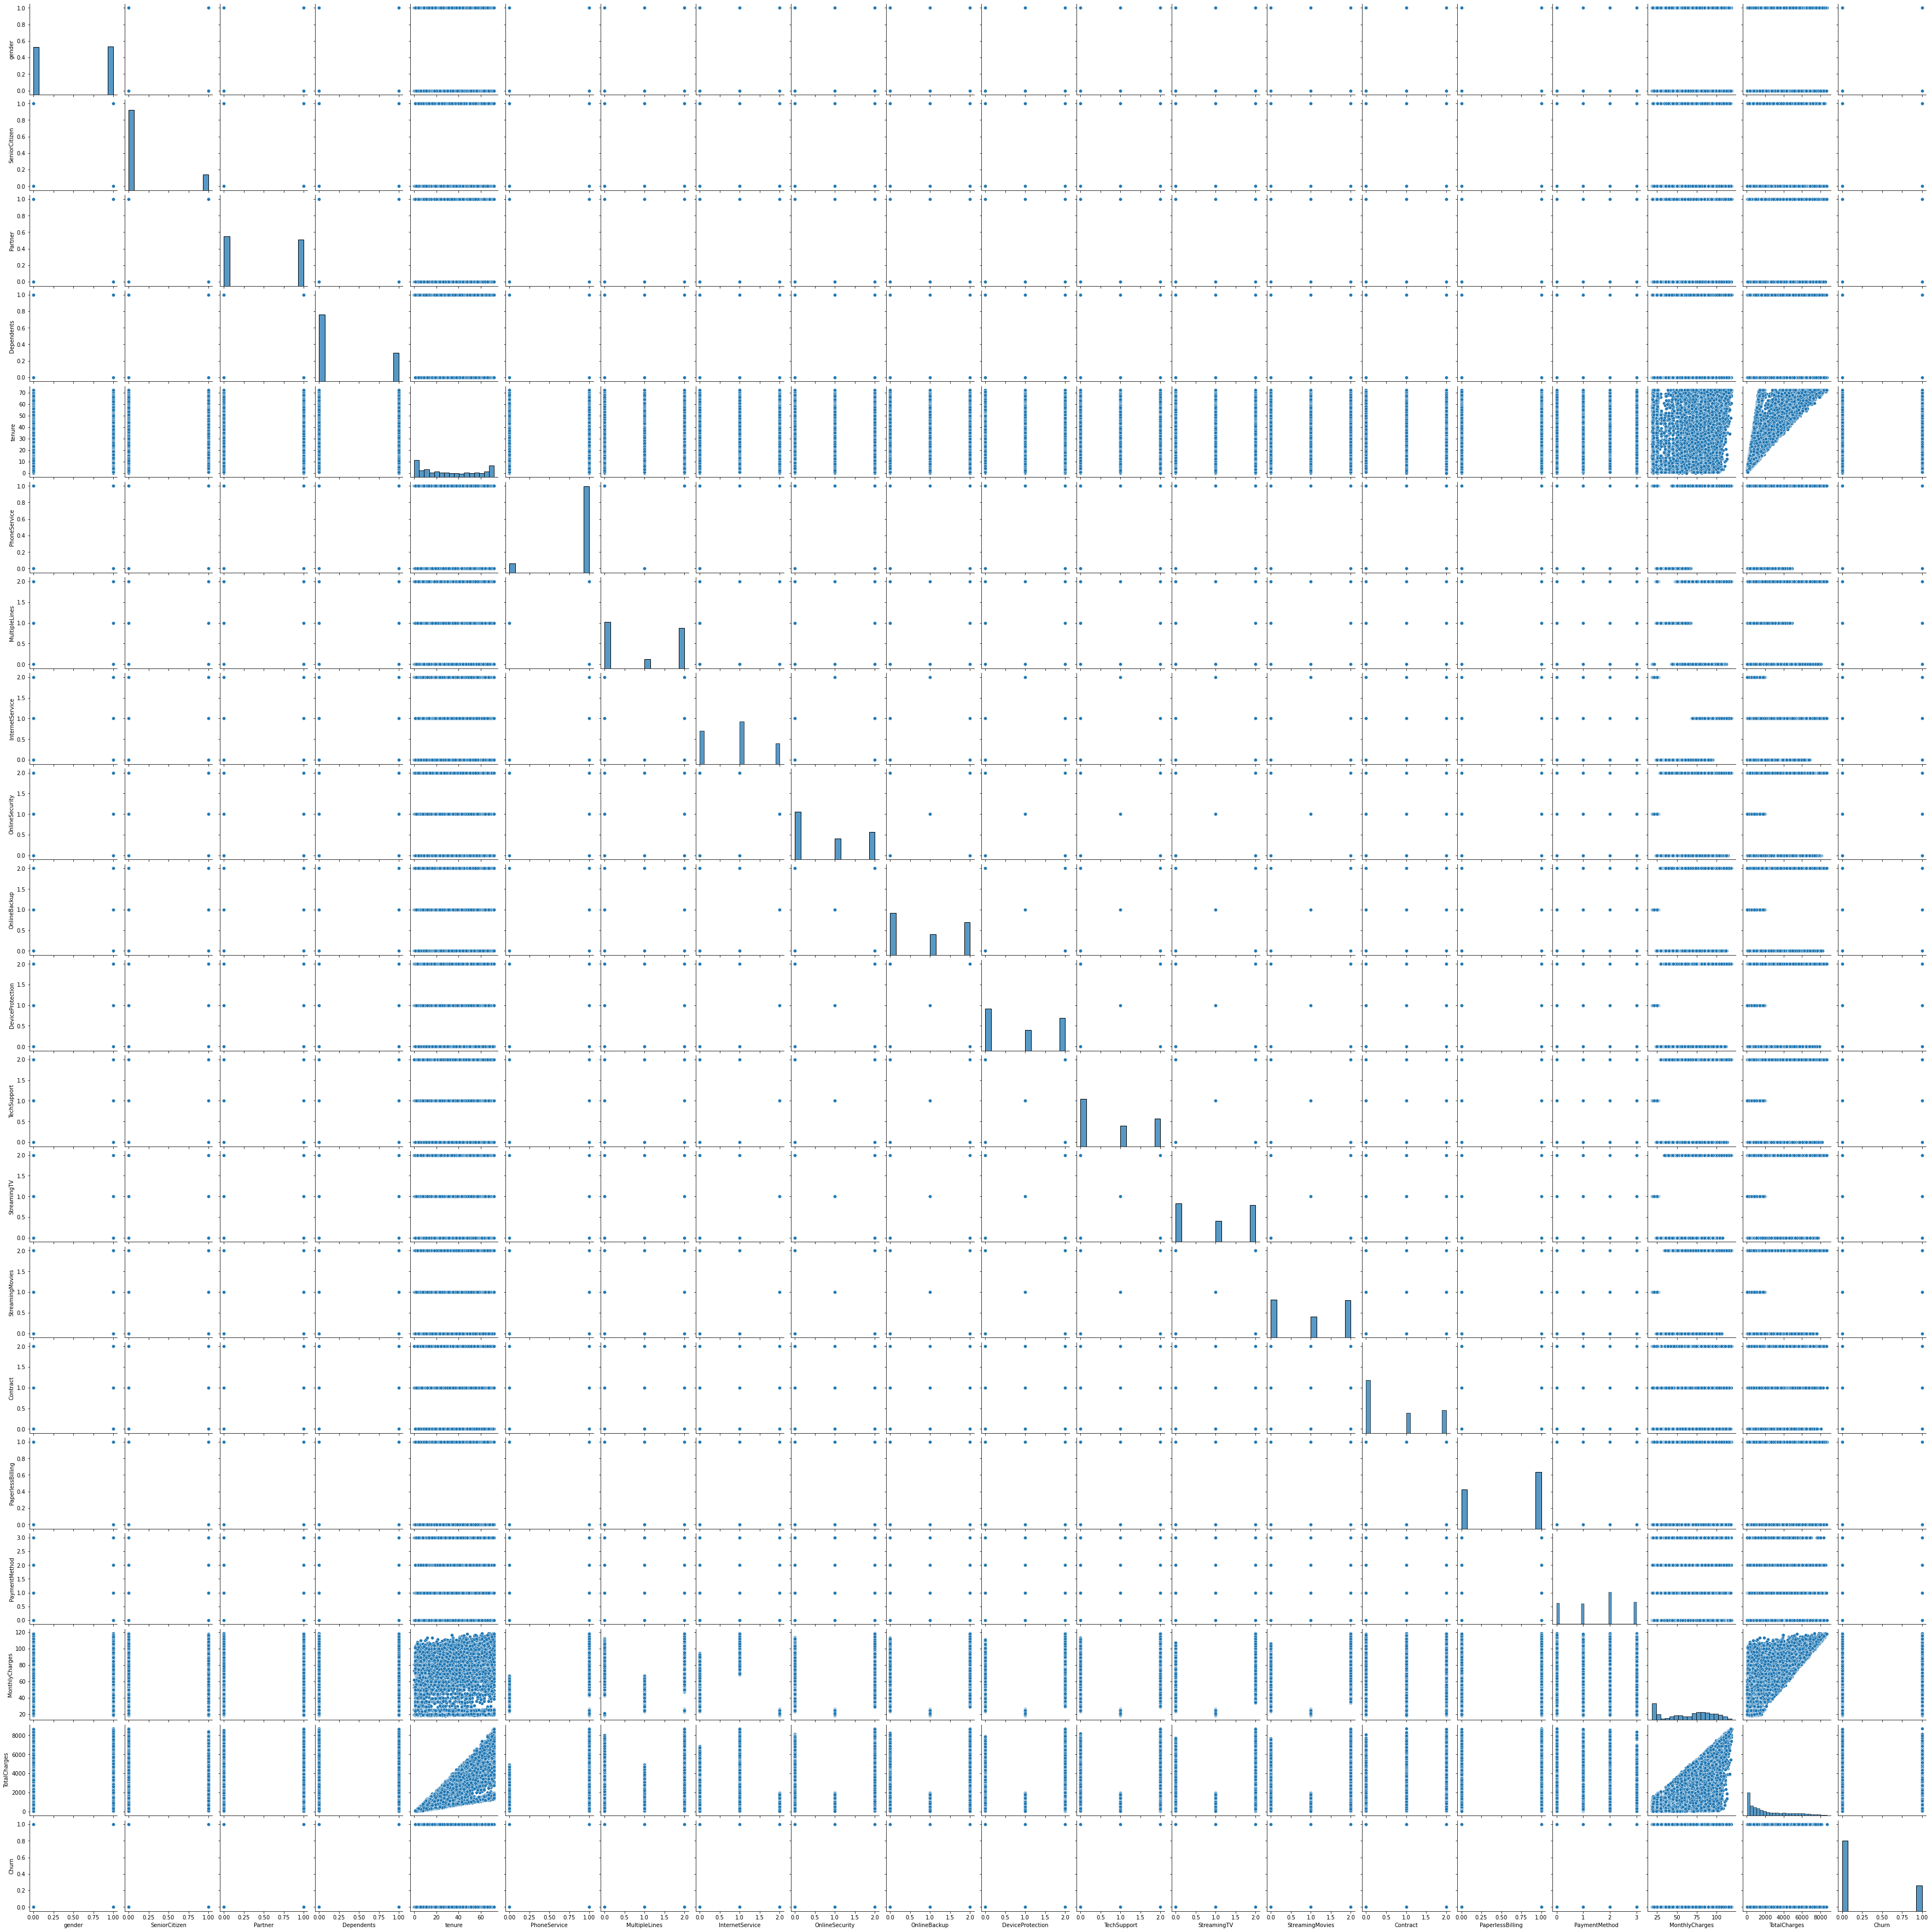

In [167]:
#plotting for all the data in the dataframe pairplot:
def multivariate(filename):
    data=filename
    sns.pairplot(data)
    plt.show()

multivariate(data)

In [168]:
#plotting for  continuous variables before and after standardizing StandardScaler():
def distplot(feature, frame, color='Red'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)

def check(TelecomCustomerData1):
    numerical_cols = TelecomCustomerData1.select_dtypes(include=['int64','float32','float64']).columns.values
    for feat in numerical_cols: distplot(feat, TelecomCustomerData1)
        
def postdistplot(TelecomCustomerData1):
    TelecomCustomerData_std = pd.DataFrame(StandardScaler().fit_transform(TelecomCustomerData1[numerical_cols].astype('float64')),
                           columns=numerical_cols)
    for feat in numerical_cols: distplot(feat, TelecomCustomerData_std, color='gray')

In [ ]:
check(data)
postdistplot(data)

In [ ]:
#droping all the unwanted columns
Data = data.drop([ 'gender', 'SeniorCitizen', 'Partner', 'Dependents','tenure',
                  'MultipleLines', 'DeviceProtection','TechSupport','PaperlessBilling',
                 'OnlineSecurity','OnlineBackup'],axis=1)

In [ ]:
#input Data
X = Data.drop(['Churn'],axis=1)
X.head(2)

In [ ]:
#target data:
Y = Data['Churn']
Y.head()

In [ ]:
#split the data:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

<b><font size=6>Train the model with XGBoost</font></b>

In [ ]:
model2  =XGBRFClassifier().fit(X_train,y_train)
accuracy_score=model2.score(X_test,y_test)
accuracy_score

<b><font size=6>Save the model</font></b>

In [ ]:
import pickle
pickle.dump(model2, open('model.pkl', 'wb'))

<b><font size=6>Load the model</font></b>

In [ ]:
pickled_model = pickle.load(open('model.pkl', 'rb'))
pickled_model.predict(X_test)